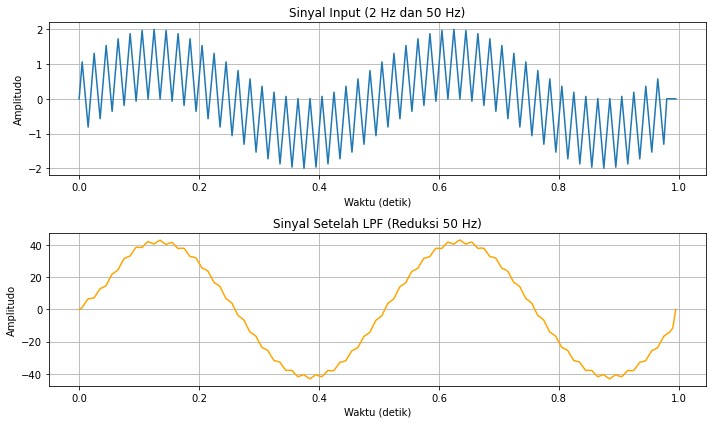

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter sinyal
fs = 200  # Frekuensi sampling (Hz)
fc = 10 # Frekuensi cutoff
t = np.arange(0, 1, 1/fs)  # Durasi sinyal 1 detik
x1 = np.zeros(200)
x2 = np.zeros(200)
x = np.zeros(200)
# Sinyal input
f1 = 2  # Frekuensi 2 Hz
f2 = 50  # Frekuensi 50 Hz
for n in range(len(x)-1):
    x1[n] = np.sin(2 * np.pi * f1 * n/fs)  # Sinyal sinus 2 Hz
    x2[n] = np.sin(2 * np.pi * f2 * n/fs)  # Sinyal sinus 50 Hz
    x[n] = x1[n] + x2[n]  # Gabungan sinyal
    
# Parameter filter LPF
r = 0.9  # Nilai radius
theta = 2*np.pi*fc / fs  # Sudut theta
# Inisialisasi output y(n)
y = np.zeros_like(x)

for n in range(5):
    x[-n] = x[0]
# Proses filtering berdasarkan persamaan pole-zero
for n in range(0, len(x)-1):
    y[n] = x[n] + 2 * x[n-1] + x[n-2] + 2 * np.cos(theta) * r * y[n-1] - r**2 * y[n-2]

# Plot hasil sinyal asli dan hasil filter
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, x, label="Sinyal Input (2 Hz + 50 Hz)")
plt.title("Sinyal Input (2 Hz dan 50 Hz)")
plt.xlabel("Waktu (detik)")
plt.ylabel("Amplitudo")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t, y, label="Sinyal Setelah LPF", color='orange')
plt.title("Sinyal Setelah LPF (Reduksi 50 Hz)")
plt.xlabel("Waktu (detik)")
plt.ylabel("Amplitudo")
plt.grid(True)

plt.tight_layout()
plt.show()



C:\Users\Nada FH\AppData\Local\Temp\ipykernel_25320\1236461566.py:16: RuntimeWarning: divide by zero encountered in log10
  plt.plot(Omega / np.pi, 20 * np.log10(np.abs(H)))  # Plot dalam dB


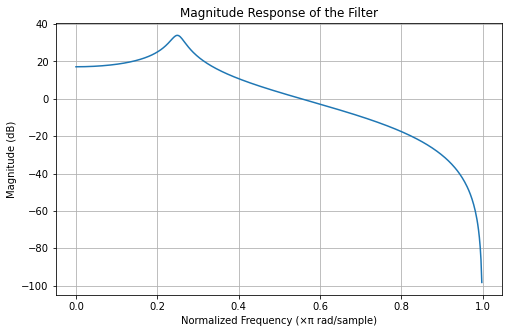

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter filter
r = 0.95  # Nilai radius
theta = np.pi / 4  # Sudut theta
Omega = np.linspace(0, np.pi, 500)  # Frekuensi normalisasi (0 sampai pi)

# Hitung magnitude response berdasarkan persamaan yang diberikan
numerator = (np.cos(2*Omega) + 2*np.cos(Omega) + 1)**2 + (np.sin(2*Omega) + 2*np.sin(Omega))**2
denominator = (np.cos(2*Omega) - 2*r*np.cos(theta)*np.cos(Omega) + r**2)**2 + (np.sin(2*Omega) - 2*r*np.cos(theta)*np.sin(Omega))**2
H = np.sqrt(numerator / denominator)

# Plot magnitude response
plt.figure(figsize=(8, 5))
plt.plot(Omega / np.pi, 20 * np.log10(np.abs(H)))  # Plot dalam dB
plt.title('Magnitude Response of the Filter')
plt.xlabel('Normalized Frequency (×π rad/sample)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
plt.show()


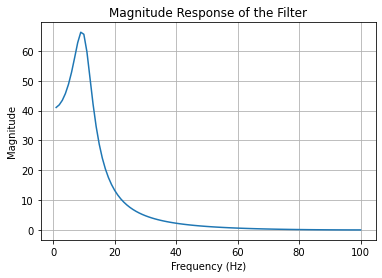

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter
fs = 200  # Frekuensi sampling
r = 0.9  # Nilai radius
fc = 10  # Frekuensi cutoff
theta = 2*np.pi*fc / fs  # Sudut theta

frequencies = np.arange(1, int(np.round(fs/2)) + 1)  # Frekuensi dari 1 hingga fs/2
H1_omega_frek = []  # List untuk menyimpan hasil H(omega)

# Proses perhitungan
for f in frequencies:
    ubah_skala = (2 * 180 * f) / fs  # Mengubah skala dari 180 ke fs/2
    omega_frek = ubah_skala * np.pi / 180  # Mengubah dari derajat ke radian

    num1_frek = (np.cos(2 * omega_frek) + 2 * np.cos(omega_frek) + 1)**2 + (np.sin(2 * omega_frek) + 2 * np.sin(omega_frek))**2
    denum1_frek = (np.cos(2 * omega_frek) - 2 * r * np.cos(theta) * np.cos(omega_frek) + r**2)**2 + (np.sin(2 * omega_frek) - 2 * r * np.cos(theta) * np.sin(omega_frek))**2
    H1_omega_frek.append(np.sqrt(num1_frek / denum1_frek))

# Plot hasil
plt.plot(frequencies, H1_omega_frek)
plt.title("Magnitude Response of the Filter")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()
